In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. Membaca dataset
df = pd.read_csv(r'C:\Users\OPTION\Downloads\Python DA\[Belum Upload]Projects 25_​​Bakery Transactional Sales Analysis\Bakery.csv',  parse_dates=['DateTime'])
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [6]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (20507, 5)


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  20507 non-null  int64         
 1   Items          20507 non-null  object        
 2   DateTime       20507 non-null  datetime64[ns]
 3   Daypart        20507 non-null  object        
 4   DayType        20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


,TransactionNo
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [9]:
print("Ukuran data awal:", df.shape)

Ukuran data awal: (20507, 5)


In [10]:
# --- Deteksi duplikat dan missing values ---
duplicates = df[df.duplicated()]
print("Jumlah baris duplikat:", duplicates.shape[0])

missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah baris duplikat: 1620
Jumlah missing values per kolom:
TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64


In [11]:
# --- Tambah kolom ItemCount ---
# Misalkan kolom Items berisi daftar item yang dipisahkan dengan koma.
df['ItemCount'] = df['Items'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

In [12]:
# --- Deteksi outlier menggunakan metode IQR pada kolom ItemCount ---
Q1 = df['ItemCount'].quantile(0.25)
Q3 = df['ItemCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ItemCount'] < lower_bound) | (df['ItemCount'] > upper_bound)]
print("Jumlah baris outlier (berdasarkan ItemCount):", outliers.shape[0])

Jumlah baris outlier (berdasarkan ItemCount): 0


In [13]:
# --- Statistik data sebelum cleaning ---
print("Statistik data sebelum cleaning:")
print(df.describe(include='all'))

Statistik data sebelum cleaning:


C:\Users\OPTION\AppData\Local\Temp\ipykernel_10564\877223812.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


        TransactionNo   Items             DateTime    Daypart  DayType  \
count    20507.000000   20507                20507      20507    20507   
unique            NaN      94                 9465          4        2   
top               NaN  Coffee  2017-02-17 14:18:20  Afternoon  Weekday   
freq              NaN    5471                   11      11569    12807   
first             NaN     NaN  2016-01-11 07:51:20        NaN      NaN   
last              NaN     NaN  2017-12-03 16:28:00        NaN      NaN   
mean      4976.202370     NaN                  NaN        NaN      NaN   
std       2796.203001     NaN                  NaN        NaN      NaN   
min          1.000000     NaN                  NaN        NaN      NaN   
25%       2552.000000     NaN                  NaN        NaN      NaN   
50%       5137.000000     NaN                  NaN        NaN      NaN   
75%       7357.000000     NaN                  NaN        NaN      NaN   
max       9684.000000     NaN         

In [14]:
# --- Proses Data Cleaning ---
# Hapus duplikat
df_cleaned = df.drop_duplicates()
# Hapus missing values
df_cleaned = df_cleaned.dropna()
# Hapus outlier berdasarkan ItemCount
df_cleaned = df_cleaned[(df_cleaned['ItemCount'] >= lower_bound) & (df_cleaned['ItemCount'] <= upper_bound)]
print("Ukuran data setelah cleaning:", df_cleaned.shape)

Ukuran data setelah cleaning: (18887, 6)


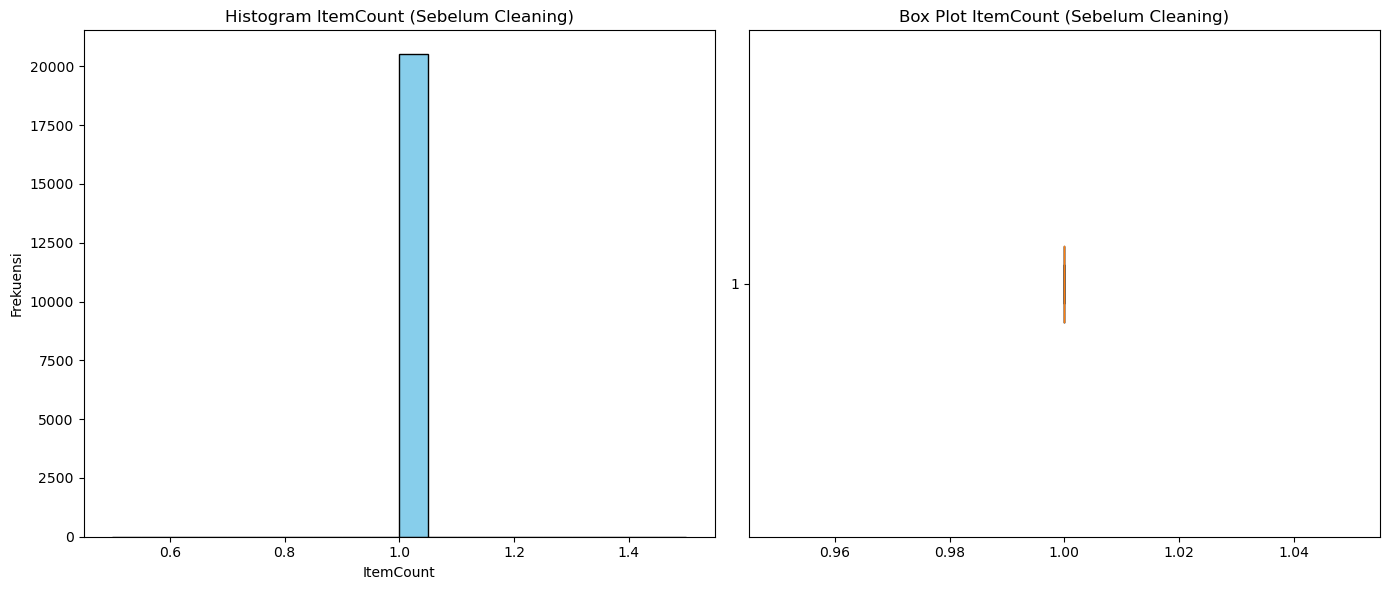

In [15]:
# --- Perbandingan Visualisasi: Histogram dan Box Plot ItemCount ---
# Visualisasi sebelum cleaning
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df['ItemCount'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram ItemCount (Sebelum Cleaning)")
plt.xlabel("ItemCount")
plt.ylabel("Frekuensi")

plt.subplot(1,2,2)
plt.boxplot(df['ItemCount'], vert=False)
plt.title("Box Plot ItemCount (Sebelum Cleaning)")
plt.tight_layout()
plt.show()

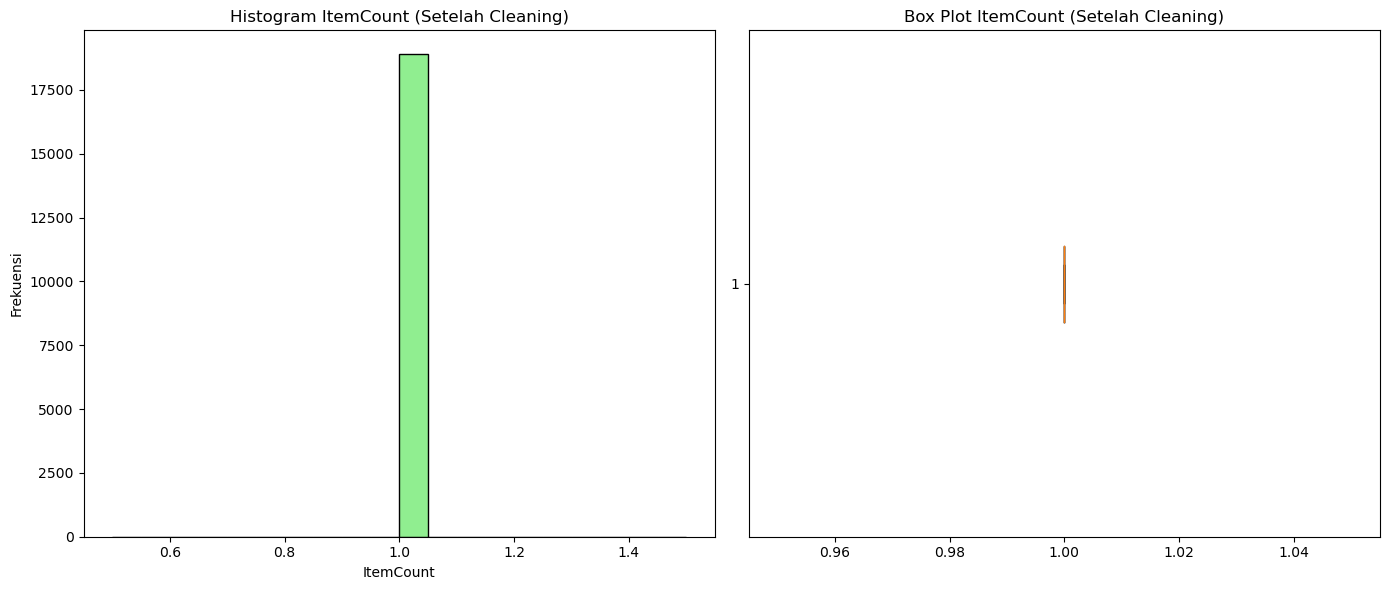

Dataset cleaned telah disimpan sebagai 'Bakery_cleaned.csv'


In [16]:
# Visualisasi setelah cleaning
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_cleaned['ItemCount'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram ItemCount (Setelah Cleaning)")
plt.xlabel("ItemCount")
plt.ylabel("Frekuensi")

plt.subplot(1,2,2)
plt.boxplot(df_cleaned['ItemCount'], vert=False)
plt.title("Box Plot ItemCount (Setelah Cleaning)")
plt.tight_layout()
plt.show()

# --- Simpan dataset yang telah dibersihkan ---
df_cleaned.to_csv('Bakery_cleaned.csv', index=False)
print("Dataset cleaned telah disimpan sebagai 'Bakery_cleaned.csv'")


In [17]:
# --- Membaca dataset yang telah dibersihkan ---
df_cleaned = pd.read_csv('Bakery_cleaned.csv', parse_dates=['DateTime'])
# Pastikan kolom ItemCount sudah ada (jika belum, hitung kembali)
df_cleaned['ItemCount'] = df_cleaned['Items'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

In [18]:
# --- Metrik 1: Total Transactions ---
total_transactions = df_cleaned['TransactionNo'].nunique()
print("Total Transactions:", total_transactions)

Total Transactions: 9465


In [19]:
# --- Metrik 2: Total Unique Items ---
# Memecah string Items agar tiap item individual dihitung
all_items = df_cleaned['Items'].str.split(',', expand=True).stack().str.strip()
unique_items = all_items.unique()
total_unique_items = len(unique_items)
print("Total Unique Items:", total_unique_items)

Total Unique Items: 94


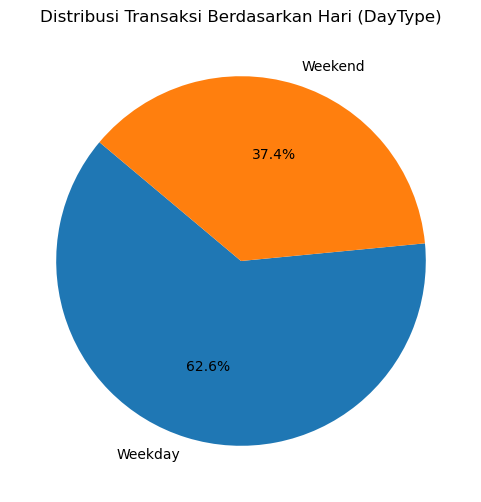

In [20]:
# --- Visualisasi 1: Pie Chart - Transactional Days (DayType) ---
plt.figure(figsize=(6,6))
daytype_counts = df_cleaned['DayType'].value_counts()
plt.pie(daytype_counts, labels=daytype_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Transaksi Berdasarkan Hari (DayType)")
plt.show()

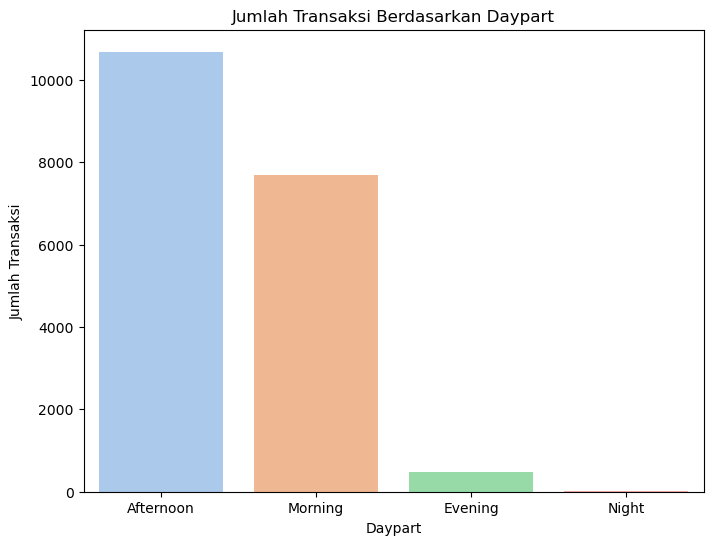

In [21]:
# --- Visualisasi 2: Bar Chart - Transactional Day Parts (Daypart) ---
plt.figure(figsize=(8,6))
sns.countplot(data=df_cleaned, x='Daypart', 
              order=df_cleaned['Daypart'].value_counts().index,
              palette='pastel')
plt.title("Jumlah Transaksi Berdasarkan Daypart")
plt.xlabel("Daypart")
plt.ylabel("Jumlah Transaksi")
plt.show()

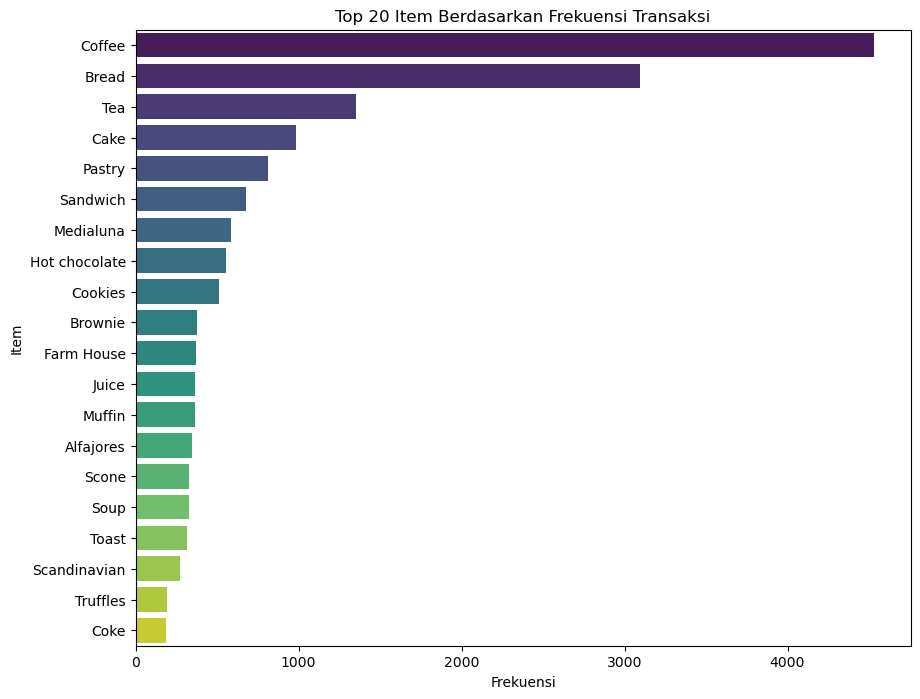

In [26]:
# --- Visualisasi 3: Horizontal Bar Chart Ranking 20 Besar Item berdasarkan Frekuensi ---
# Pastikan variabel all_items sudah berisi item individual dari kolom 'Items'
item_counts = all_items.value_counts()
top20_item_counts = item_counts.head(20)

plt.figure(figsize=(10,8))
sns.barplot(x=top20_item_counts.values, y=top20_item_counts.index, palette='viridis')
plt.title("Top 20 Item Berdasarkan Frekuensi Transaksi")
plt.xlabel("Frekuensi")
plt.ylabel("Item")
plt.show()

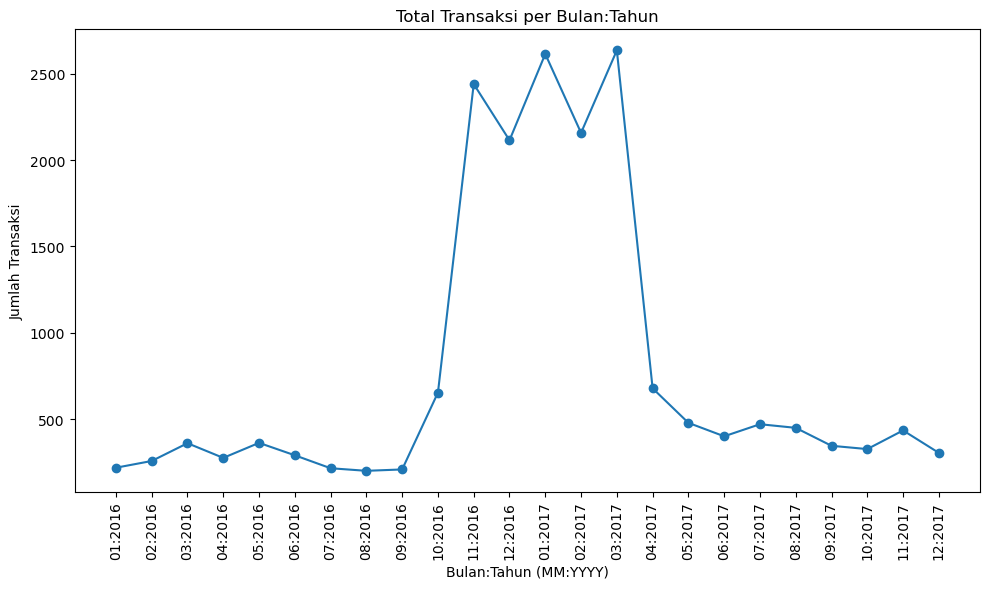

In [28]:
# --- Visualisasi 4: Line Chart - Total Transactions by Date ---
# Mengonversi kolom DateTime ke format Bulan:Tahun (MM:YYYY)
df_cleaned['MonthYear'] = df_cleaned['DateTime'].dt.strftime('%m:%Y')

# Mengelompokkan transaksi berdasarkan MonthYear
transactions_by_month = df_cleaned.groupby('MonthYear').size().reset_index(name='TransactionCount')

# Untuk memastikan urutan kronologis, konversi kembali MonthYear ke tipe datetime dan urutkan
transactions_by_month['SortDate'] = pd.to_datetime(transactions_by_month['MonthYear'], format='%m:%Y')
transactions_by_month = transactions_by_month.sort_values('SortDate')

# Membuat Line Chart
plt.figure(figsize=(10,6))
plt.plot(transactions_by_month['MonthYear'], transactions_by_month['TransactionCount'], marker='o', linestyle='-')
plt.title("Total Transaksi per Bulan:Tahun")
plt.xlabel("Bulan:Tahun (MM:YYYY)")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- Membaca dataset yang telah dibersihkan ---
# df = pd.read_csv('Bakery_cleaned.csv', parse_dates=['DateTime'])
# df['ItemCount'] = df['Items'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# st.title("Dashboard Transaksi Bakery")

# # --- Tampilkan Metrik ---
# st.header("Metrik Utama")
# total_transactions = df['TransactionNo'].nunique()
# all_items = df['Items'].str.split(',', expand=True).stack().str.strip()
# total_unique_items = len(all_items.unique())
# st.metric("Total Transactions", total_transactions)
# st.metric("Total Unique Items", total_unique_items)

# # --- Pie Chart: Transactional Days (DayType) ---
# st.header("Distribusi Transaksi Berdasarkan Hari (DayType)")
# daytype_counts = df['DayType'].value_counts()
# fig1, ax1 = plt.subplots()
# ax1.pie(daytype_counts, labels=daytype_counts.index, autopct='%1.1f%%', startangle=140)
# ax1.axis('equal')
# st.pyplot(fig1)

# # --- Bar Chart: Transaction Count by Daypart ---
# st.header("Transaksi Berdasarkan Daypart")
# fig2, ax2 = plt.subplots()
# sns.countplot(data=df, x='Daypart', order=df['Daypart'].value_counts().index, ax=ax2, palette='pastel')
# ax2.set_title("Transaksi per Daypart")
# ax2.set_xlabel("Daypart")
# ax2.set_ylabel("Jumlah Transaksi")
# st.pyplot(fig2)

# # --- Horizontal Bar Chart: Transactions by Items ---
# st.header("Transaksi Berdasarkan Item")
# item_counts = all_items.value_counts()
# fig3, ax3 = plt.subplots(figsize=(10,8))
# sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis', ax=ax3)
# ax3.set_title("Jumlah Transaksi per Item")
# ax3.set_xlabel("Frekuensi")
# ax3.set_ylabel("Item")
# st.pyplot(fig3)

# # --- Line Chart: Total Transactions by Date ---
# st.header("Total Transaksi per Tanggal")
# df['Date'] = df['DateTime'].dt.date
# transactions_by_date = df.groupby('Date').size()
# fig4, ax4 = plt.subplots(figsize=(10,6))
# ax4.plot(transactions_by_date.index, transactions_by_date.values, marker='o')
# ax4.set_title("Total Transaksi per Tanggal")
# ax4.set_xlabel("Tanggal")
# ax4.set_ylabel("Jumlah Transaksi")
# plt.xticks(rotation=45)
# st.pyplot(fig4)
